In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from platform import python_version

print(python_version())

3.7.10


In [ ]:
pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.1
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.1
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==7.4.0
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.22
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
dlib==19.18.0
dm-tree==0.1.6
docopt==0.6.2


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# params we will probably want to do some hyperparameter optimization later
BASE_MODEL= 'ResNet101' #'DenseNet121'  #'ResNet101' # ['VGG16', 'RESNET52', 'InceptionV3', 'Xception', 'DenseNet169', 'DenseNet121']
IMG_SIZE = (224, 224) # [(224, 224), (384, 384), (512, 512), (640, 640)]
BATCH_SIZE = 16 # [1, 8, 16, 24]
DENSE_COUNT = 128 # [32, 64, 128, 256]
DROPOUT = 0.25 # [0, 0.25, 0.5]
LEARN_RATE = 1e-4 # [1e-4, 1e-3, 4e-3]
TRAIN_SAMPLES = 8000 # [3000, 6000, 15000]
TEST_SAMPLES = 800
USE_ATTN = False # [True, False]

In [ ]:
image_bbox_df = pd.read_csv('/content/drive/MyDrive/Pneumonia/lung opacity overview/image_bbox_full.csv')
'''
image_bbox_df['path'] = image_bbox_df['path'].map(lambda x: 
                                                  x.replace('input', 
                                                            'input/rsna-pneumonia-detection-challenge'))
print(image_bbox_df.shape[0], 'images')
image_bbox_df.sample(3)


image_bbox_df['new_class'] = image_bbox_df['class'].map({'No Lung Opacity / Not Normal' : 'Non-Pneumonia', 'Normal':'Non-Pneumonia','Lung Opacity': 'Pneumonia' })




# get the labels in the right format
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
class_enc = LabelEncoder()
image_bbox_df['class_idx'] = class_enc.fit_transform(image_bbox_df['new_class'])
oh_enc = OneHotEncoder(sparse=False)
image_bbox_df['class_vec'] = oh_enc.fit_transform(
    image_bbox_df['class_idx'].values.reshape(-1, 1)).tolist() 
image_bbox_df.sample(3)


from sklearn.model_selection import train_test_split
image_df = image_bbox_df.groupby('patientId').apply(lambda x: x.sample(1))
raw_train_df, valid_df = train_test_split(image_df, test_size=0.25, random_state=2018,
                                    stratify=image_df['class'])
print(raw_train_df.shape, 'training data')
print(valid_df.shape, 'validation data')



fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
raw_train_df.groupby('new_class').size().plot.bar(ax=ax1)
train_df = raw_train_df.groupby('new_class').\
   apply(lambda x: x.sample(12000//3)).\
   reset_index(drop=True)
train_df = raw_train_df.groupby('class').apply(lambda x: x.sample(n={'Lung Opacity':4000, 'Normal':4000, 'No Lung Opacity / Not Normal':2000}.get(x.name))).reset_index(drop = True)

train_df.groupby('new_class').size().plot.bar(ax=ax2) 
train_df.groupby('class').size().plot.bar() 
print(train_df.shape[0], 'new training size') '''

"\nimage_bbox_df['path'] = image_bbox_df['path'].map(lambda x: \n                                                  x.replace('input', \n                                                            'input/rsna-pneumonia-detection-challenge'))\nprint(image_bbox_df.shape[0], 'images')\nimage_bbox_df.sample(3)\n\n\nimage_bbox_df['new_class'] = image_bbox_df['class'].map({'No Lung Opacity / Not Normal' : 'Non-Pneumonia', 'Normal':'Non-Pneumonia','Lung Opacity': 'Pneumonia' })\n\n\n\n\n# get the labels in the right format\nfrom sklearn.preprocessing import LabelEncoder, OneHotEncoder\nclass_enc = LabelEncoder()\nimage_bbox_df['class_idx'] = class_enc.fit_transform(image_bbox_df['new_class'])\noh_enc = OneHotEncoder(sparse=False)\nimage_bbox_df['class_vec'] = oh_enc.fit_transform(\n    image_bbox_df['class_idx'].values.reshape(-1, 1)).tolist() \nimage_bbox_df.sample(3)\n\n\nfrom sklearn.model_selection import train_test_split\nimage_df = image_bbox_df.groupby('patientId').apply(lambda x: x.sam

In [ ]:
import pandas as pd
male_adult_df = pd.read_csv('/content/drive/MyDrive/Pneumonia/separated rsna overview/male_df.csv')
female_adult_df = pd.read_csv('/content/drive/MyDrive/Pneumonia/separated rsna overview/female_df.csv')
child_df = pd.read_csv('/content/drive/MyDrive/Pneumonia/separated rsna overview/child_df.csv')
male_pa_df = pd.read_csv('/content/drive/MyDrive/Pneumonia/male_adult_pa_pneumonea/male_adult_pa.csv')
female_pa_df = pd.read_csv('/content/drive/MyDrive/Pneumonia/female_adult_pa_pneumonia/female_pa_adult.csv')


In [ ]:
#new column, male  = 0, female  = 1
male_pa_df['gender'] = 0
female_pa_df['gender'] = 1
mf_df = pd.concat([male_pa_df,female_pa_df], ignore_index = True)
mf_df.head()

,Unnamed: 0,Target,boxes,class,height,path,patientId,width,x,y,gender
0,6,1.0,2.0,Lung Opacity,608.0,../input/rsna-pneumonia-detection-challenge/st...,001031d9-f904-4a23-b3e5-2c088acd19c6,373.0,66.0,160.0,0
1,7,1.0,2.0,Lung Opacity,676.0,../input/rsna-pneumonia-detection-challenge/st...,001031d9-f904-4a23-b3e5-2c088acd19c6,376.0,552.0,164.0,0
2,8,0.0,1.0,Normal,NaN,../input/rsna-pneumonia-detection-challenge/st...,0010f549-b242-4e94-87a8-57d79de215fc,NaN,NaN,NaN,0
3,12,0.0,1.0,Normal,NaN,../input/rsna-pneumonia-detection-challenge/st...,0022995a-45eb-4cfa-9a59-cd15f5196c64,NaN,NaN,NaN,0
4,20,0.0,1.0,Normal,NaN,../input/rsna-pneumonia-detection-challenge/st...,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,0


In [ ]:
mf_df.iloc[0, 5]

'../input/rsna-pneumonia-detection-challenge/stage_2_train_images/001031d9-f904-4a23-b3e5-2c088acd19c6.dcm'

In [ ]:
mf_df.groupby('gender').size()

gender
0    8360
1    6530
dtype: int64

In [ ]:
working_df =male_pa_df.copy() #mf_df.copy()# mf_df.copy()#image_bbox_df #mf_df.copy() #male_pa_df.copy() # female_pa_df.copy() #mf_df.copy() # #

In [ ]:
working_df.head()

,Unnamed: 0,Target,boxes,class,height,path,patientId,width,x,y,gender
0,6,1.0,2.0,Lung Opacity,608.0,../input/rsna-pneumonia-detection-challenge/st...,001031d9-f904-4a23-b3e5-2c088acd19c6,373.0,66.0,160.0,0
1,7,1.0,2.0,Lung Opacity,676.0,../input/rsna-pneumonia-detection-challenge/st...,001031d9-f904-4a23-b3e5-2c088acd19c6,376.0,552.0,164.0,0
2,8,0.0,1.0,Normal,NaN,../input/rsna-pneumonia-detection-challenge/st...,0010f549-b242-4e94-87a8-57d79de215fc,NaN,NaN,NaN,0
3,12,0.0,1.0,Normal,NaN,../input/rsna-pneumonia-detection-challenge/st...,0022995a-45eb-4cfa-9a59-cd15f5196c64,NaN,NaN,NaN,0
4,20,0.0,1.0,Normal,NaN,../input/rsna-pneumonia-detection-challenge/st...,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,0


In [ ]:
working_df = working_df.drop(working_df[working_df['class'] == 'No Lung Opacity / Not Normal'].index)
working_df['new_class'] = working_df['class'].map({ 'Normal':'Non-Pneumonia','Lung Opacity': 'Pneumonia' })

In [ ]:
#working_df = working_df.drop('Unnamed: 0', axis = 1)
#working_df['new_class'] = working_df['class'].map({'No Lung Opacity / Not Normal' : 'Non-Pneumonia', 'Normal':'Non-Pneumonia','Lung Opacity': 'Pneumonia' })

In [ ]:
working_df['path'] = working_df['path'].str.replace('../input/rsna-pneumonia-detection-challenge/','/content/drive/MyDrive/Pneumonia/rsna dataset/') #../input/rsna-pneumonia-detection-challenge ##../input/

In [ ]:
working_df.head()

,Unnamed: 0,Target,boxes,class,height,path,patientId,width,x,y,gender,new_class
0,6,1.0,2.0,Lung Opacity,608.0,/content/drive/MyDrive/Pneumonia/rsna dataset/...,001031d9-f904-4a23-b3e5-2c088acd19c6,373.0,66.0,160.0,0,Pneumonia
1,7,1.0,2.0,Lung Opacity,676.0,/content/drive/MyDrive/Pneumonia/rsna dataset/...,001031d9-f904-4a23-b3e5-2c088acd19c6,376.0,552.0,164.0,0,Pneumonia
2,8,0.0,1.0,Normal,NaN,/content/drive/MyDrive/Pneumonia/rsna dataset/...,0010f549-b242-4e94-87a8-57d79de215fc,NaN,NaN,NaN,0,Non-Pneumonia
3,12,0.0,1.0,Normal,NaN,/content/drive/MyDrive/Pneumonia/rsna dataset/...,0022995a-45eb-4cfa-9a59-cd15f5196c64,NaN,NaN,NaN,0,Non-Pneumonia
4,20,0.0,1.0,Normal,NaN,/content/drive/MyDrive/Pneumonia/rsna dataset/...,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,0,Non-Pneumonia


In [ ]:
working_df.groupby('class').size()

class
Lung Opacity    1054
Normal          3969
dtype: int64

In [ ]:
working_df.iloc[0,5]

'/content/drive/MyDrive/Pneumonia/rsna dataset/stage_2_train_images/001031d9-f904-4a23-b3e5-2c088acd19c6.dcm'

In [ ]:
# get the labels in the right format
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
class_enc = LabelEncoder()
working_df['class_idx'] = class_enc.fit_transform(working_df['new_class'])
oh_enc = OneHotEncoder(sparse=False)
working_df['class_vec'] = oh_enc.fit_transform(
    working_df['class_idx'].values.reshape(-1, 1)).tolist() 
working_df.sample(3)

,Unnamed: 0,Target,boxes,class,height,path,patientId,width,x,y,gender,new_class,class_idx,class_vec
7387,26826,1.0,2.0,Lung Opacity,177.0,/content/drive/MyDrive/Pneumonia/rsna dataset/...,e51ae9d8-2e5b-40a1-89fd-06b60fd64355,161.0,670.0,404.0,0,Pneumonia,1,"[0.0, 1.0]"
6294,22977,0.0,1.0,Normal,NaN,/content/drive/MyDrive/Pneumonia/rsna dataset/...,c53e009c-d663-45c3-b1be-a2c3806fc2e4,NaN,NaN,NaN,0,Non-Pneumonia,0,"[1.0, 0.0]"
5831,21225,0.0,1.0,Normal,NaN,/content/drive/MyDrive/Pneumonia/rsna dataset/...,b8d2820d-6c9a-4c99-b169-754077f9fac8,NaN,NaN,NaN,0,Non-Pneumonia,0,"[1.0, 0.0]"


In [ ]:
from sklearn.model_selection import train_test_split
image_df = working_df.groupby('patientId').apply(lambda x: x.sample(1))
raw_train_df, valid_df = train_test_split(image_df, test_size=0.20, random_state=2018,
                                    stratify=image_df['new_class'])
print(raw_train_df.shape, 'training data')
print(valid_df.shape, 'validation data')

(3812, 14) training data
(954, 14) validation data


In [ ]:
raw_train_df.groupby('class').size()

class
Lung Opacity     637
Normal          3175
dtype: int64

In [ ]:
raw_train_df.groupby('new_class').size()

new_class
Non-Pneumonia    3175
Pneumonia         637
dtype: int64

800 new training size


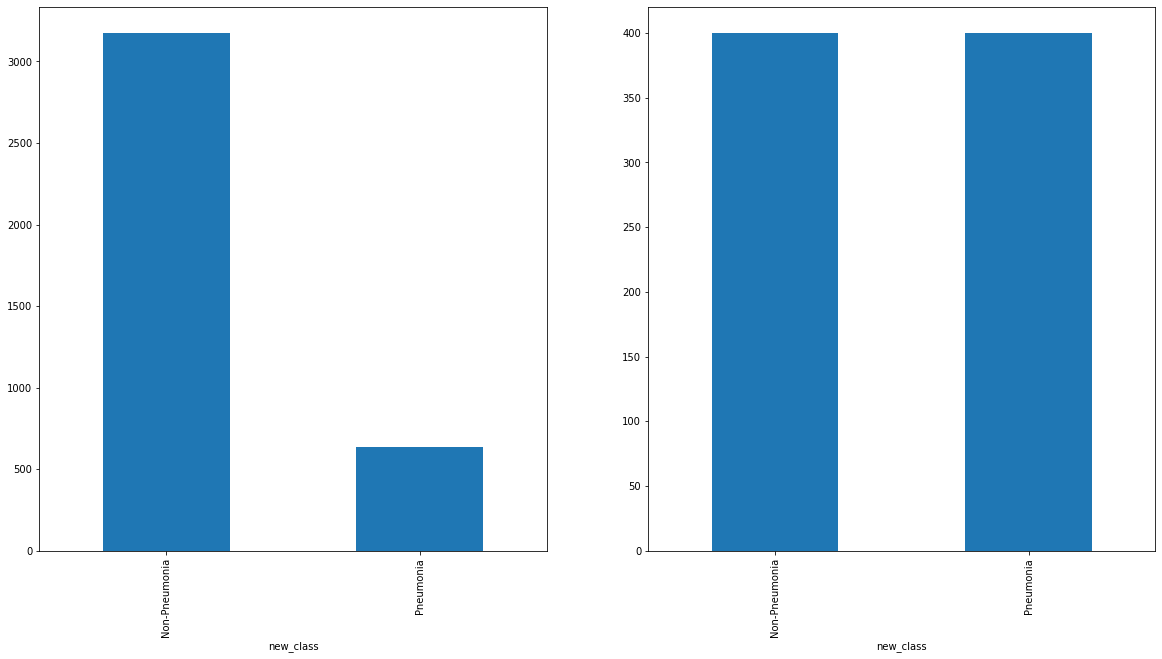

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
raw_train_df.groupby('new_class').size().plot.bar(ax=ax1)
#train_df = raw_train_df.groupby('new_class').\
#   apply(lambda x: x.sample(12000//3)).\
#   reset_index(drop=True)
train_df = raw_train_df.groupby('class').apply(lambda x: x.sample(n={'Lung Opacity':400, 'Normal':400}.get(x.name))).reset_index(drop = True) #1076 #4800

train_df.groupby('new_class').size().plot.bar(ax=ax2) 
#train_df.groupby('class').size().plot.bar() 
print(train_df.shape[0], 'new training size')

In [ ]:
pip install pydicom==1.2.0

     |████████████████████████████████| 7.3MB 33.4MB/s 


In [ ]:
try:
    # keras 2.2
    import keras_preprocessing.image.utils as KPImageUtils
    import keras_preprocessing.image as KPImage
except:
    # keras 2.1
    import keras.preprocessing.image as KPImage
    
from PIL import Image
import pydicom
def read_dicom_image(in_path):
    img_arr = pydicom.read_file(in_path).pixel_array
    return img_arr/img_arr.max()
    
class medical_pil():
    @staticmethod
    def open(in_path):
        if '.dcm' in in_path:
            c_slice = read_dicom_image(in_path)
            int_slice =  (255*c_slice).clip(0, 255).astype(np.uint8) # 8bit images are more friendly
            return Image.fromarray(int_slice)
        else:
            return Image.open(in_path)
    fromarray = Image.fromarray

In [ ]:
KPImageUtils.pil_image = medical_pil

In [ ]:
from PIL import Image
KPImageUtils._PIL_INTERPOLATION_METHODS = {
        'nearest': Image.NEAREST,
        'bilinear': Image.BILINEAR,
        'bicubic': Image.BICUBIC,
    }

def load_img(path, grayscale=False, color_mode='rgb', target_size=None,
                 interpolation='nearest'):
        """Loads an image into PIL format.
        # Arguments
            path: Path to image file.
            grayscale: DEPRECATED use `color_mode="grayscale"`.
            color_mode: The desired image format. One of "grayscale", "rgb", "rgba".
                "grayscale" supports 8-bit images and 32-bit signed integer images.
                Default: "rgb".
            target_size: Either `None` (default to original size)
                or tuple of ints `(img_height, img_width)`.
            interpolation: Interpolation method used to resample the image if the
                target size is different from that of the loaded image.
                Supported methods are "nearest", "bilinear", and "bicubic".
                If PIL version 1.1.3 or newer is installed, "lanczos" is also
                supported. If PIL version 3.4.0 or newer is installed, "box" and
                "hamming" are also supported.
                Default: "nearest".
        # Returns
            A PIL Image instance.
        # Raises
            ImportError: if PIL is not available.
            ValueError: if interpolation method is not supported.
        """
        if grayscale is True:
            warnings.warn('grayscale is deprecated. Please use '
                          'color_mode = "grayscale"')
            color_mode = 'grayscale'
        if KPImageUtils.pil_image is None:
            raise ImportError('Could not import PIL.Image. '
                              'The use of `load_img` requires PIL.')
        with open(path, 'rb') as f:
            img = KPImageUtils.pil_image.open(path)
            if color_mode == 'grayscale':
                # if image is not already an 8-bit, 16-bit or 32-bit grayscale image
                # convert it to an 8-bit grayscale image.
                if img.mode not in ('L', 'I;16', 'I'):
                    img = img.convert('L')
            elif color_mode == 'rgba':
                if img.mode != 'RGBA':
                    img = img.convert('RGBA')
            elif color_mode == 'rgb':
                if img.mode != 'RGB':
                    img = img.convert('RGB')
            else:
                raise ValueError('color_mode must be "grayscale", "rgb", or "rgba"')
            if target_size is not None:
                width_height_tuple = (target_size[1], target_size[0])
                if img.size != width_height_tuple:
                    if interpolation not in KPImageUtils._PIL_INTERPOLATION_METHODS:
                        raise ValueError(
                            'Invalid interpolation method {} specified. Supported '
                            'methods are {}'.format(
                                interpolation,
                                ", ".join(KPImageUtils._PIL_INTERPOLATION_METHODS.keys())))
                    resample = KPImageUtils._PIL_INTERPOLATION_METHODS[interpolation]
                    img = img.resize(width_height_tuple, resample)
            return img

        
KPImageUtils.load_img = load_img        
def _get_batches_of_transformed_samples(self, index_array):
    """Gets a batch of transformed samples.
    # Arguments
        index_array: Array of sample indices to include in batch.
    # Returns
        A batch of transformed samples.
    """
    #for i, n_observation in enumerate(index_array):
     #   print(str(i) + "+ " + str( n_observation))
    batch_x = np.zeros((len(index_array),) + self.image_shape, dtype=self.dtype)
    # build batch of image data
    # self.filepaths is dynamic, is better to call it once outside the loop
    filepaths = self.filepaths
    for i, j in enumerate(index_array):
        img = KPImageUtils.load_img(filepaths[j],
                       color_mode=self.color_mode,
                       target_size=self.target_size,
                       interpolation=self.interpolation)
        x = KPImageUtils.img_to_array(img, data_format=self.data_format)
        # Pillow images should be closed after `load_img`,
        # but not PIL images.
        if hasattr(img, 'close'):
            img.close()
        if self.image_data_generator:
            params = self.image_data_generator.get_random_transform(x.shape)
            x = self.image_data_generator.apply_transform(x, params)
            x = self.image_data_generator.standardize(x)
        batch_x[i] = x
    # optionally save augmented images to disk for debugging purposes
    if self.save_to_dir:
        for i, j in enumerate(index_array):
            img = KPImageUtils.array_to_img(batch_x[i], self.data_format, scale=True)
            fname = '{prefix}_{index}_{hash}.{format}'.format(
                prefix=self.save_prefix,
                index=j,
                hash=np.random.randint(1e7),
                format=self.save_format)
            img.save(os.path.join(self.save_to_dir, fname))
    # build batch of labels
    if self.class_mode == 'input':
        batch_y = batch_x.copy()
    elif self.class_mode in {'binary', 'sparse'}:
        #print(str(self.classes.shape))
        #print(str(len(batch_x)))
        try:
            batch_y = np.empty([len(batch_x), self.classes.shape[1]], dtype=self.dtype)
        except:
            batch_y = np.empty([len(batch_x), 1], dtype=self.dtype)
        #print(batch_y)
        
        #print(str(len(index_array)))
        
        #print(str(batch_y.shape))
        
        for i, n_observation in enumerate(index_array):
            #print(self.classes[n_observation])
            #print(batch_y[i])
            batch_y[i] = self.classes[n_observation]
    elif self.class_mode == 'categorical':
        batch_y = np.zeros((len(batch_x), len(self.class_indices)),
                           dtype=self.dtype)
        for i, n_observation in enumerate(index_array):
            batch_y[i, self.classes[n_observation]] = 1.
    elif self.class_mode == 'multi_output':
        batch_y = [output[index_array] for output in self.labels]
    elif self.class_mode == 'raw':
        batch_y = self.labels[index_array]
    else:
        return batch_x
    if self.sample_weight is None:
        return batch_x, batch_y
    else:
        return batch_x, batch_y, self.sample_weight[index_array]

In [ ]:
from keras_preprocessing.image.iterator import BatchFromFilesMixin
BatchFromFilesMixin._get_batches_of_transformed_samples = _get_batches_of_transformed_samples

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
if BASE_MODEL=='VGG16':
    from keras.applications.vgg16 import VGG16 as PTModel, preprocess_input
elif BASE_MODEL=='RESNET52':
    from keras.applications.resnet50 import ResNet50 as PTModel, preprocess_input
elif BASE_MODEL=='InceptionV3':
    from keras.applications.inception_v3 import InceptionV3 as PTModel, preprocess_input
elif BASE_MODEL=='Xception':
    from keras.applications.xception import Xception as PTModel, preprocess_input
elif BASE_MODEL=='DenseNet169': 
    from keras.applications.densenet import DenseNet169 as PTModel, preprocess_input
elif BASE_MODEL=='DenseNet121':
    from keras.applications.densenet import DenseNet121 as PTModel, preprocess_input
elif BASE_MODEL=='ResNet50':
    from keras.applications.resnet50 import ResNet50 as PTModel, preprocess_input
elif BASE_MODEL=='ResNet101':
    from keras.applications.resnet import ResNet101 as PTModel, preprocess_input
elif BASE_MODEL=='DenseNet201':
    from keras.applications import DenseNet201 as PTModel
    from keras.applications.densenet import  preprocess_input
else:
    raise ValueError('Unknown model: {}'.format(BASE_MODEL))

Image Augmentation

In [ ]:
img_gen_args = dict(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.05, 
                              width_shift_range = 0.02, 
                              rotation_range = 3, 
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range = 0.05,
                              preprocessing_function=preprocess_input,) # preprocessing_function=preprocess_input ###from vgg16 inplace of rescale 
img_gen = ImageDataGenerator(**img_gen_args)

In [ ]:
img_gen_args = dict(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.2, #0.05, 
                              width_shift_range = 0.15, #0.02, 
                              rotation_range = 45, #3 
                              shear_range = 16, #0.01,
                              fill_mode = 'nearest',
                              zoom_range=0.2, #[0.8, 1.5], #, #0.05,
                              preprocessing_function=preprocess_input,) # preprocessing_function=preprocess_input ###from vgg16 inplace of rescale 
img_gen = ImageDataGenerator(**img_gen_args)

In [ ]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, seed = None, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways: seed: {}'.format(seed))
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'binary',
                                              seed = seed,
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values,0)
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [ ]:
train_df.head()

,Unnamed: 0,Target,boxes,class,height,path,patientId,width,x,y,gender,new_class,class_idx,class_vec
0,712,1.0,3.0,Lung Opacity,284.0,/content/drive/MyDrive/Pneumonia/rsna dataset/...,085a6486-c3b3-4ca2-80f1-be07d23e853b,185.0,665.0,231.0,0,Pneumonia,1,"[0.0, 1.0]"
1,21446,1.0,1.0,Lung Opacity,124.0,/content/drive/MyDrive/Pneumonia/rsna dataset/...,ba30b9a4-bebd-4196-a972-e7178508b55e,248.0,148.0,497.0,0,Pneumonia,1,"[0.0, 1.0]"
2,3125,1.0,2.0,Lung Opacity,343.0,/content/drive/MyDrive/Pneumonia/rsna dataset/...,2a4489f6-6f7b-46f5-a937-281206307943,168.0,226.0,367.0,0,Pneumonia,1,"[0.0, 1.0]"
3,19922,1.0,1.0,Lung Opacity,165.0,/content/drive/MyDrive/Pneumonia/rsna dataset/...,b01ee12f-55ad-4548-84ac-a560a0a429ad,194.0,613.0,313.0,0,Pneumonia,1,"[0.0, 1.0]"
4,14245,1.0,1.0,Lung Opacity,156.0,/content/drive/MyDrive/Pneumonia/rsna dataset/...,84102d80-4e38-4676-8012-1e76204dcefc,280.0,179.0,643.0,0,Pneumonia,1,"[0.0, 1.0]"


In [ ]:
train_gen = flow_from_dataframe(img_gen, train_df, #raw train df if use unbalance data
                             path_col = 'path',
                            y_col = 'class_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = BATCH_SIZE)

valid_gen = flow_from_dataframe(img_gen, valid_df, 
                             path_col = 'path',
                            y_col = 'class_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 256) # we can use much larger batches for evaluation 256
# used a fixed dataset for evaluating the algorithm
valid_X, valid_Y = next(flow_from_dataframe(img_gen, 
                               valid_df, 
                             path_col = 'path',
                            y_col = 'class_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb', #rgb
                            batch_size = TEST_SAMPLES)) # one big batch

## Ignore next message from keras, values are replaced anyways: seed: None
Found 0 images belonging to 0 classes.
Reinserting dataframe: 800 images
## Ignore next message from keras, values are replaced anyways: seed: None
Found 0 images belonging to 0 classes.
Reinserting dataframe: 954 images
## Ignore next message from keras, values are replaced anyways: seed: None
Found 0 images belonging to 0 classes.
Reinserting dataframe: 954 images


In [ ]:
import pydicom as pyd
pyd.__version__

'1.2.0'

In [ ]:
t_x, t_y = next(train_gen)
print(t_x.shape, t_y.shape)

(16, 224, 224, 3) (16, 2)


In [ ]:
train_gen.classes

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
!python --version

Python 3.7.10


In [ ]:
import tensorflow as tf
from keras.layers import Input, Conv2D, BatchNormalization, Dense
from keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from keras.models import Model
from keras.layers import ReLU, concatenate
import keras.backend as K

# Creating Densenet121
def densenet(input_shape, n_classes, filters = 32):
    
    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)
    #x = GlobalAveragePooling2D()(d)
    #output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, d)
    return model


In [ ]:

n_classes = 2
base_pretrained_model = densenet( t_x.shape[1:],n_classes)
base_pretrained_model.summary()

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
from keras import __version__

In [ ]:
__version__

'2.4.3'

Model architecture

In [ ]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda, AvgPool2D, LeakyReLU
from keras.models import Model
from keras.optimizers import Adam
from keras import regularizers
from keras.models import Sequential
from keras.optimizers import Adam,  RMSprop
#with strategy.scope():
base_pretrained_model = PTModel(input_shape =  t_x.shape[1:], 
                          include_top = False, weights = 'imagenet')




171450368/171446536 [==============================] - 2s 0us/step


In [ ]:
for layer in base_pretrained_model.layers:
  if layer.output.shape[1:3] == [7,7]: # or layer.output.shape[1:3] == [14,14] :
    layer.trainable = True
  else :
    layer.trainable = False

In [ ]:

#base_pretrained_model.layers[-288].trainable

True

In [ ]:
#base_pretrained_model.trainable = False

In [ ]:
base_pretrained_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [ ]:

pt_features = Input(base_pretrained_model.layers[-1].output.shape[1:], name = 'feature_input')
pt_depth = base_pretrained_model.layers[-1].output.shape[1:]

from keras.layers import BatchNormalization

bn_features = BatchNormalization()(pt_features)
gap = GlobalAveragePooling2D()(bn_features)

gap_dr = Dropout(DROPOUT)(gap)
dr_steps = Dropout(DROPOUT)(Dense(DENSE_COUNT, activation = 'elu')(gap_dr))

#dr_steps = BatchNormalization()(dr_steps)
#dr_steps = LeakyReLU(0.1)(dr_steps)
#dr_steps = Dropout(DROPOUT)(Dense(DENSE_COUNT, activation = 'elu')(dr_steps))
#dr_steps = Dropout(DROPOUT)(Dense(DENSE_COUNT, activation = 'elu')(dr_steps))


out_layer = Dense(t_y.shape[1], activation = 'softmax')(dr_steps)

attn_model = Model(inputs = [pt_features], 
                   outputs = [out_layer], name = 'trained_model')
pneu_model = Sequential(name = 'combined_model')
#base_pretrained_model.trainable = False
pneu_model.add(base_pretrained_model)
pneu_model.add(attn_model)
pneu_model.compile(optimizer = RMSprop(lr=0.0001, decay=1e-5), loss = 'binary_crossentropy', #Adam(lr = LEARN_RATE)
                           metrics = ['binary_accuracy'])
pneu_model.summary()

Model: "combined_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 7, 7, 2048)        42658176  
_________________________________________________________________
trained_model (Functional)   (None, 2)                 270722    
Total params: 42,928,898
Trainable params: 42,819,458
Non-trainable params: 109,440
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('lung_opacity')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, 
                                   patience=10, verbose=1, mode='auto', 
                                   min_delta=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=10) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
train_gen.batch_size = BATCH_SIZE
history = pneu_model.fit_generator(train_gen, 
                         steps_per_epoch=train_gen.n//BATCH_SIZE,
                         validation_data=(valid_X, valid_Y), 
                         epochs=11, 
                         callbacks=callbacks_list,
                         workers=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/11
50/50 [==============================] - 154s 2s/step - loss: 0.5710 - binary_accuracy: 0.7246 - val_loss: 0.4850 - val_binary_accuracy: 0.8800

Epoch 00001: val_loss improved from inf to 0.48504, saving model to lung_opacity_weights.best.hdf5
Epoch 2/11
50/50 [==============================] - 29s 569ms/step - loss: 0.4227 - binary_accuracy: 0.8243 - val_loss: 0.3702 - val_binary_accuracy: 0.9162

Epoch 00002: val_loss improved from 0.48504 to 0.37017, saving model to lung_opacity_weights.best.hdf5
Epoch 3/11
50/50 [==============================] - 29s 566ms/step - loss: 0.3742 - binary_accuracy: 0.8552 - val_loss: 0.3965 - val_binary_accuracy: 0.9137

Epoch 00003: val_loss did not improve from 0.37017
Epoch 4/11
50/50 [==============================] - 29s 572ms/step - loss: 0.3093 - binary_accuracy: 0.8584 - val_loss: 0.8529 - val_binary_accuracy: 0.8550

Epoch 00004: val_loss did not improve from 0.37017
Epoch 5/11
50/50 [==============================] - 30s 573ms/step

In [ ]:


pred_Y = pneu_model.predict(valid_X, 
                          batch_size = BATCH_SIZE,  
                          verbose = True
                          ) 



50/50 [==============================] - 5s 80ms/step


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy', 'lr'])


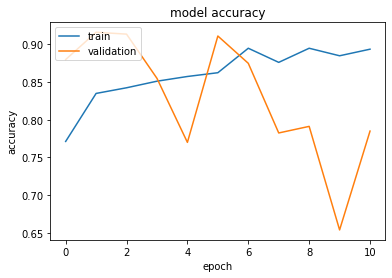

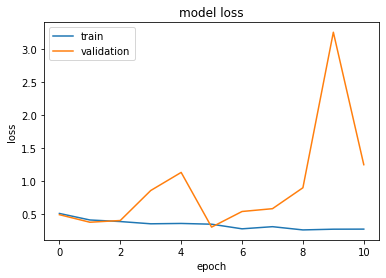

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy', 'lr'])


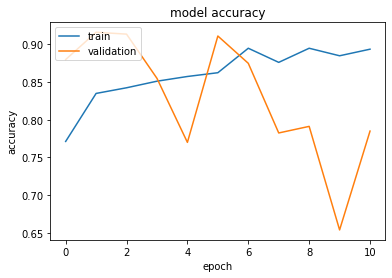

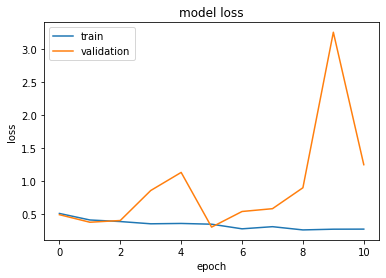

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

               precision    recall  f1-score   support

Non-Pneumonia       0.96      0.77      0.86       662
    Pneumonia       0.44      0.86      0.58       138

     accuracy                           0.79       800
    macro avg       0.70      0.82      0.72       800
 weighted avg       0.87      0.79      0.81       800



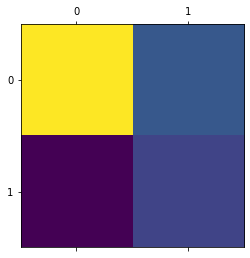

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
plt.matshow(confusion_matrix(np.argmax(valid_Y, -1), np.argmax(pred_Y,-1)))
print(classification_report(np.argmax(valid_Y, -1), 
                            np.argmax(pred_Y,-1), target_names = class_enc.classes_))

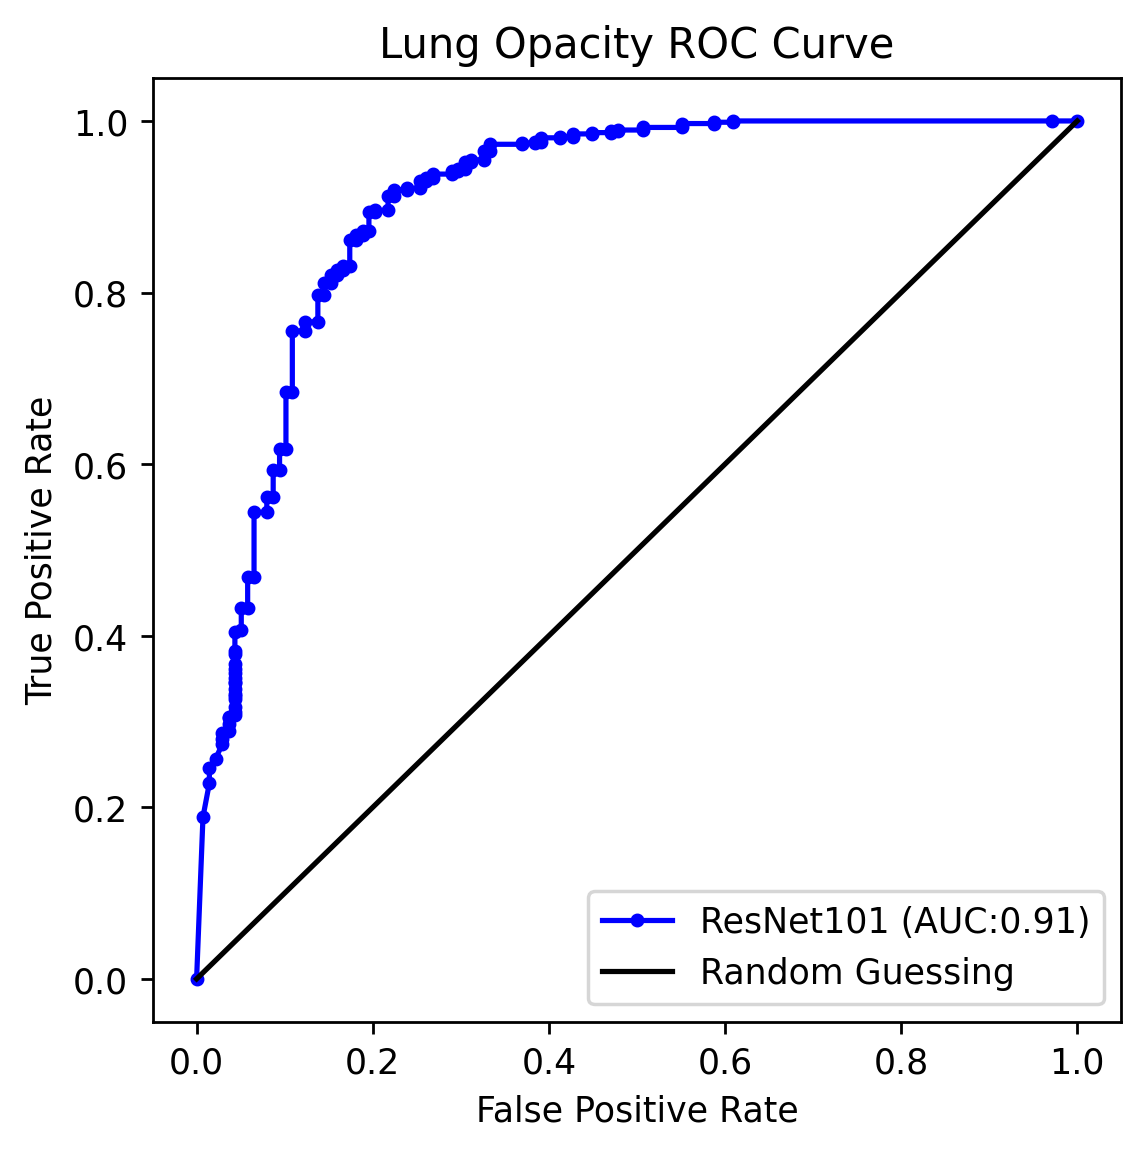

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(np.argmax(valid_Y,-1)==0, pred_Y[:,0])
fig, ax1 = plt.subplots(1,1, figsize = (5, 5), dpi = 250)
ax1.plot(fpr, tpr, 'b.-', label = 'ResNet101 (AUC:%2.2f)' % roc_auc_score(np.argmax(valid_Y,-1)==0, pred_Y[:,0]))
ax1.plot(fpr, fpr, 'k-', label = 'Random Guessing')
ax1.legend(loc = 4)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');
ax1.set_title('Lung Opacity ROC Curve')
fig.savefig('roc_valid.pdf') 

Load local test data

In [ ]:
local_output = pd.read_csv('/content/drive/MyDrive/Pneumonia/loca_data_output_final/local_data_output_final.csv')
local_output = local_output.drop(['Unnamed: 0'], axis = 1)

In [ ]:
local_output['Doctor 1/Ground Truth'] = local_output['Doctor 1/Ground Truth'].map({'No':0, 'Yes': 1})
local_output['Doctor 2'] = local_output['Doctor 2'].map({'No':0, 'Yes': 1})
local_output['Doctor 3'] = local_output['Doctor 3'].map({'No':0, 'Yes': 1})
local_output['class'] = local_output['class'].map({'No':0, 'Yes': 1})
local_output.head()

,ID,Doctor 1/Ground Truth,Doctor 2,Doctor 3,class
0,1,0,0,1,0
1,2,0,0,0,0
2,3,0,1,1,1
3,4,1,0,1,1
4,5,1,0,1,1


In [ ]:


TEST_DIR2 =  "/content/drive/MyDrive/Pneumonia/local separated images"
batch_size_test = 1
nb_test_samples2 = 129

test_generator2 = img_gen.flow_from_directory(
    TEST_DIR2,
    classes=['male-female-mod'],
    # don't generate labels
    class_mode='binary',
    # don't shuffle
    shuffle=False,
    target_size = IMG_SIZE,
    color_mode = 'rgb',
    batch_size=batch_size_test,)



Found 129 images belonging to 1 classes.


In [ ]:
test_generator2.reset()
preds2 = pneu_model.predict_generator(test_generator2, workers = 1,steps=np.ceil(nb_test_samples2/batch_size_test)) #changed worker to 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
preds2

array([[3.55921075e-05, 9.99964356e-01],
       [9.99999881e-01, 7.55528262e-08],
       [7.83657444e-11, 1.00000000e+00],
       [9.99999523e-01, 4.66253425e-07],
       [9.99915600e-01, 8.43604648e-05],
       [9.93771255e-01, 6.22872310e-03],
       [9.99995112e-01, 4.93250900e-06],
       [4.71121781e-02, 9.52887833e-01],
       [4.48282994e-02, 9.55171645e-01],
       [9.99990821e-01, 9.18963178e-06],
       [9.99998212e-01, 1.76559547e-06],
       [9.99975801e-01, 2.42304031e-05],
       [9.99406099e-01, 5.93853241e-04],
       [7.13793124e-05, 9.99928594e-01],
       [1.00000000e+00, 2.60274441e-10],
       [9.99999285e-01, 7.33487980e-07],
       [1.00000000e+00, 5.06621500e-09],
       [1.90285202e-02, 9.80971515e-01],
       [2.85302964e-03, 9.97147024e-01],
       [9.42110121e-01, 5.78898601e-02],
       [7.66042252e-09, 1.00000000e+00],
       [2.27849139e-03, 9.97721493e-01],
       [9.99957681e-01, 4.22769117e-05],
       [9.99234557e-01, 7.65506062e-04],
       [9.975276

In [ ]:

preds2 = np.argmax(preds2, axis=-1)

data = {'col_1': test_generator2.filenames, 'col_2': preds2}
df=pd.DataFrame.from_dict(data)


In [ ]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [ ]:
ids = [x for x in df['col_1'] ]
ids = [natural_keys(x)[1] for x in ids]
df['ID'] = np.asarray(ids)
df = df.sort_values(by='ID')
df = df.reset_index(drop  =True)

In [ ]:
df

,col_1,col_2,ID
0,male-female-mod/1.jpg,1,1
1,male-female-mod/2.jpg,0,2
2,male-female-mod/3.jpg,0,3
3,male-female-mod/4.jpg,0,4
4,male-female-mod/5.jpg,1,5
...,...,...,...
124,male-female-mod/134.jpg,0,134
125,male-female-mod/136.jpg,0,136
126,male-female-mod/137.jpg,0,137
127,male-female-mod/138.jpg,1,138


In [ ]:
df[df['col_2'] == 1]

,col_1,col_2,ID
0,male-female-mod/1.jpg,1,1
4,male-female-mod/5.jpg,1,5
7,male-female-mod/8.jpg,1,8
8,male-female-mod/9.jpg,1,9
10,male-female-mod/12.jpg,1,12
12,male-female-mod/14.jpg,1,14
18,male-female-mod/20.jpg,1,20
20,male-female-mod/22.jpg,1,22
21,male-female-mod/24.jpg,1,24
22,male-female-mod/25.jpg,1,25


In [ ]:
df[df['col_2'] == 1].shape

(45, 3)

               precision    recall  f1-score   support

Non-Pneumonia       0.77      0.76      0.77        85
    Pneumonia       0.56      0.57      0.56        44

     accuracy                           0.70       129
    macro avg       0.66      0.67      0.67       129
 weighted avg       0.70      0.70      0.70       129



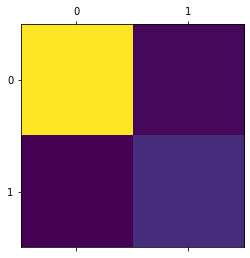

In [ ]:
plt.matshow(confusion_matrix(np.asarray(local_output['class']), np.asarray(df['col_2'])))
print(classification_report(np.asarray(local_output['class']), 
                           np.asarray(df['col_2']), target_names = class_enc.classes_))

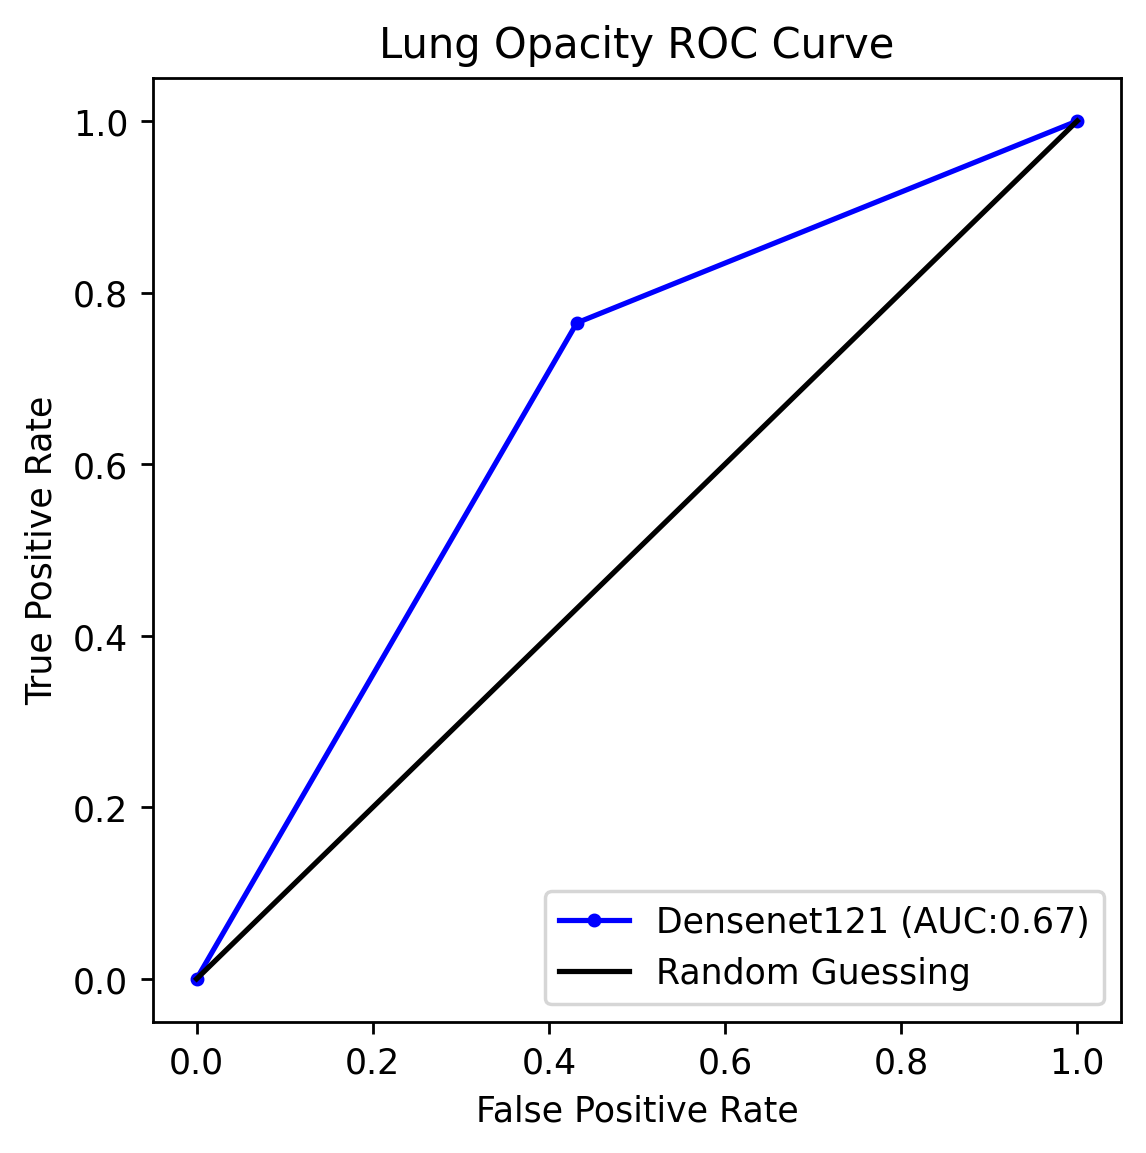

In [ ]:


from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(np.asarray(local_output['class'])==0, np.asarray(df['col_2'] == 0))
fig, ax1 = plt.subplots(1,1, figsize = (5, 5), dpi = 250)
ax1.plot(fpr, tpr, 'b.-', label = 'Densenet121 (AUC:%2.2f)' % roc_auc_score(np.asarray(local_output['class'])==0,np.asarray(df['col_2'] == 0)))
ax1.plot(fpr, fpr, 'k-', label = 'Random Guessing')
ax1.legend(loc = 4)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');
ax1.set_title('Lung Opacity ROC Curve')
fig.savefig('roc_valid.pdf') 



In [ ]:
pneu_model.save('densenet121 male female pa rsna normal and pneumonea 11 epochs train auc 96% test auc 67% last to 14_14 layer unfreeze_new augmentation_zoom.h5')

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

Prediction for each image

In [ ]:
ids = [i for i in df['ID']]
preds = []
for i in ids:
  image = load('/content/drive/MyDrive/Pneumonia/local separated images/male-female-mod/' + str(i) + '.jpg')
  pred = pneu_model.predict(image)
  preds.append(pred)



In [ ]:
data = {'image_id':ids , 'probability(no and yes)': preds}
df=pd.DataFrame.from_dict(data)

In [ ]:
df

,image_id,probability(no and yes)
0,1,"[[9.256325e-08, 0.9999999]]"
1,2,"[[0.99994445, 5.5570104e-05]]"
2,3,"[[0.010087229, 0.9899128]]"
3,4,"[[0.9784627, 0.021537304]]"
4,5,"[[8.115067e-09, 1.0]]"
...,...,...
124,134,"[[0.023178779, 0.97682124]]"
125,136,"[[0.9981791, 0.0018209369]]"
126,137,"[[0.30931672, 0.69068325]]"
127,138,"[[2.9131572e-10, 1.0]]"


In [ ]:
df.to_csv('male female total densenet121 7*7_freeze_11 epochs_new augmentation+zoom.csv')

In [ ]:
df[df['image_id'] == 101]

,image_id,probability(no and yes)
92,101,"[[0.99370944, 0.00629051]]"


covxnet

In [ ]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *

def Residual_Unit(input_tensor, nb_of_input_channels, max_dilation, number_of_units):
    
    for i in range(number_of_units):
        x1 = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
        x1 = BatchNormalization()(x1)
  
        a = []

        for i in range(1, max_dilation+1):
            temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
            temp = BatchNormalization()(temp)
            a.append(temp)

        x = Concatenate(axis= -1)(a)
        x = Conv2D(nb_of_input_channels, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
        x = BatchNormalization()(x)

        x = Add()([x, input_tensor])

        input_tensor = x
  
    return x

# Shifter Unit:

def Shifter_Unit(input_tensor, nb_of_input_channels, max_dilation):
    x1 = Conv2D(nb_of_input_channels*4, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
        temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
        temp = MaxPool2D(pool_size=(2,2))(temp)
        temp = BatchNormalization()(temp)
        a.append(temp)

    x = Concatenate(axis= -1)(a)

    x = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    return x



from keras.optimizers import Adam

#Network:
  
def Network128(input_shape, nb_class, depth):
    xin = Input(shape= input_shape)

    x = Conv2D(16, kernel_size = (5,5), strides= (1,1), padding = 'same', activation='relu')(xin)
    x = BatchNormalization()(x)

    x = Conv2D(32, kernel_size = (3,3), strides= (2,2), padding = 'same', activation='relu')(x)
    x = BatchNormalization()(x)
  
  ##Max Dilation rate will be vary in the range (1,5). 

# Max Dilation rate is 5 for tensor (64x64x32)
    x = Residual_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5, number_of_units=depth)
    x = Shifter_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5)


# Max Dilation rate is 4 for (32x32x64)
    x = Residual_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4, number_of_units=depth)
    x = Shifter_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4)

# Max Dilation rate is 3 for (16x16x128)
    x = Residual_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3, number_of_units=depth)
    x = Shifter_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3)

# Max Dilation rate is 2 for (8x8x256)
    x = Residual_Unit(input_tensor=x, nb_of_input_channels=256, max_dilation=2, number_of_units=depth)

    x = GlobalAveragePooling2D()(x)

    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    x = Dense(nb_class, activation= 'softmax')(x)

    model = Model(xin, x)

    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 1e-3), metrics = ['accuracy'])

    return model 

In [ ]:
model = Network128(input_shape = (128, 128, 1), nb_class = 2, depth = 5)
model.summary() 

In [ ]:


pred = model.predict_generator(valid_gen, workers = 1,steps=np.ceil(101/16))



In [ ]:


pred = np.argmax(pred, axis=-1)
print(pred)



In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from random import shuffle
import scipy
from tqdm import tqdm  
import skimage
from skimage.transform import resize

import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import UpSampling2D
from keras.layers import Activation
from keras.layers import MaxPool2D
from keras.layers import Add
from keras.layers import Multiply
from keras.layers import Lambda

from keras.layers import Input
from keras.layers import Dense
from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Model
from keras.regularizers import l2

from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import keras

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
def residual_block(input, input_channels=None, output_channels=None, kernel_size=(3, 3), stride=1, blockName=None):

    if output_channels is None:
        output_channels = input.get_shape()[-1].value
    if input_channels is None:
        input_channels = output_channels // 4

    strides = (stride, stride)

#     x = BatchNormalization()(input)
#     x = Activation('relu')(x)
#     x = Conv2D(input_channels, (1, 1))(x)
 
    x = BatchNormalization()(input)
    x = Activation('relu')(x)
    if blockName is not None:
        blockName = blockName + 'conv1'
    x = Conv2D(input_channels, kernel_size, padding='same', strides=stride, name=blockName )(x)
    
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    if blockName is not None:
        blockName = blockName + 'conv2'
    x = Conv2D(output_channels, (1, 1), padding='same', name=blockName )(x)

    if input_channels != output_channels or stride != 1:
        if blockName is not None:
            blockName = blockName + 'conv3'
        input = Conv2D(output_channels, (1, 1), padding='same', strides=strides, name=blockName )(input)

    x = Add()([x, input])
    return x

In [ ]:
def attention_block(input, input_channels=None, output_channels=None, encoder_depth=1):

    p = 1
    t = 2
    r = 1

    if input_channels is None:
        input_channels = input.get_shape()[-1].value
    if output_channels is None:
        output_channels = input_channels

    # First Residual Block
    for i in range(p):
        input = residual_block(input)

    # Trunc Branch
    output_trunk = input
    for i in range(t):
        output_trunk = residual_block(output_trunk)

    # Soft Mask Branch

    ## encoder
    ### first down sampling
    output_soft_mask = MaxPool2D(padding='same')(input)  # 32x32
    for i in range(r):
        output_soft_mask = residual_block(output_soft_mask)

    skip_connections = []
    for i in range(encoder_depth - 1):

        ## skip connections
        output_skip_connection = residual_block(output_soft_mask)
        skip_connections.append(output_skip_connection)
        # print ('skip shape:', output_skip_connection.get_shape())

        ## down sampling
        output_soft_mask = MaxPool2D(padding='same')(output_soft_mask)
        for _ in range(r):
            output_soft_mask = residual_block(output_soft_mask)

            ## decoder
    skip_connections = list(reversed(skip_connections))
    for i in range(encoder_depth - 1):
        ## upsampling
        for _ in range(r):
            output_soft_mask = residual_block(output_soft_mask)
        output_soft_mask = UpSampling2D()(output_soft_mask)
        ## skip connections
        output_soft_mask = Add()([output_soft_mask, skip_connections[i]])

    ### last upsampling
    for i in range(r):
        output_soft_mask = residual_block(output_soft_mask)
    output_soft_mask = UpSampling2D()(output_soft_mask)

    ## Output
    output_soft_mask = Conv2D(input_channels, (1, 1))(output_soft_mask)
    output_soft_mask = Conv2D(input_channels, (1, 1))(output_soft_mask)
    output_soft_mask = Activation('sigmoid')(output_soft_mask)

    # Attention: (1 + output_soft_mask) * output_trunk
    output = Lambda(lambda x: x + 1)(output_soft_mask)
    output = Multiply()([output, output_trunk])  #

    # Last Residual Block
    for i in range(p):
        output = residual_block(output)

    return output

In [ ]:
def AttentionResNet56(shape=(224, 224, 3), n_channels=64, n_classes=100,
                      dropout=0, regularization=0.01):

    regularizer = l2(regularization)

    input_ = Input(shape=shape)
    #x = Conv2D(n_channels, (7, 7), strides=(2, 2), padding='same')(input_) # 112x112
    x = Conv2D(n_channels, (3, 3), strides=(1, 1), padding='same')(input_) # 224x224
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)  # 56x56 ##same output 224

    x = residual_block(x, output_channels=n_channels * 4,stride=2, blockName = 'resblock1')  # 56x56  ##112
    x = attention_block(x, encoder_depth=2)  # bottleneck 7x7                                           ##112

    x = residual_block(x, output_channels=n_channels * 8, stride=2, blockName = 'resblock2')  # 28x28  ##56
    x = attention_block(x, encoder_depth=1)  # bottleneck 7x7                                           ##56
    
    x = residual_block(x, output_channels=n_channels * 8, stride=2, blockName = 'resblock3')  # 28x28   ##28
    x = attention_block(x, encoder_depth=1)  # bottleneck 7x7  ##28
    
    x = residual_block(x, output_channels=n_channels * 8, stride=2, blockName = 'resblock4')  # 28x28   ##14
    x = attention_block(x, encoder_depth=1)  # bottleneck 7x7  ##14

    x = residual_block(x, output_channels=n_channels * 16, stride=2, blockName = 'resblock5')  # 7x7
    input_channels_same = x.get_shape()[-1].value
    
    x = residual_block(x, input_channels = input_channels_same,  output_channels=input_channels_same, stride=1, blockName = 'resblock6')  # 7x7
    x = residual_block(x,input_channels = input_channels_same,  output_channels=input_channels_same, stride=1, blockName = 'resblock7')  # 7x7

    pool_size = (x.get_shape()[1].value, x.get_shape()[2].value)
    x = AveragePooling2D(pool_size=pool_size, strides=(1, 1))(x)
    x = Flatten()(x)
    x = Dropout(dropout)(x)
    x = Dense(256, kernel_regularizer=regularizer, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(16, kernel_regularizer=regularizer, activation='relu')(x)
    x = Dropout(dropout)(x)
    output = Dense(n_classes, kernel_regularizer=regularizer, activation='softmax')(x)

    model = Model(input_, output)
    return model

In [ ]:


model = AttentionResNet56(n_classes=2,dropout=.25)



AttributeError: ignored

In [ ]:
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
opt = RMSprop(lr=0.0001, decay=1e-5)
es = EarlyStopping(monitor='val_loss', patience=10, 
                    verbose = 1, 
                    restore_best_weights=True)
chkpt = ModelCheckpoint(filepath='best_model_todate', save_best_only=True, save_weights_only=True)
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=opt)

In [ ]:


img_height = 224
img_width = 224

nb_train_samples = 5217
nb_validation_samples = 17
nb_test_samples=624
epochs = 30
batch_size = 16



In [ ]:


# params we will probably want to do some hyperparameter optimization later
BASE_MODEL= 'VGG16' # ['VGG16', 'RESNET52', 'InceptionV3', 'Xception', 'DenseNet169', 'DenseNet121']
IMG_SIZE = (224, 224) # [(224, 224), (384, 384), (512, 512), (640, 640)]
BATCH_SIZE = 16 # [1, 8, 16, 24]
DENSE_COUNT = 128 # [32, 64, 128, 256]
DROPOUT = 0.25 # [0, 0.25, 0.5]
LEARN_RATE = 1e-4 # [1e-4, 1e-3, 4e-3]
TRAIN_SAMPLES = 8000 # [3000, 6000, 15000]
TEST_SAMPLES = 800
USE_ATTN = False # [True, False]



In [ ]:
train_gen.batch_size = BATCH_SIZE
model.fit_generator(train_gen, 
                         steps_per_epoch=train_gen.n//BATCH_SIZE,
                         validation_data=(valid_X, valid_Y), 
                         epochs=30, 
                         callbacks=[es, chkpt],
                         workers=2)